In [15]:
import pandas as pd
from services.plots import plots
from services.reports import reports
import seaborn as sns
import matplotlib.pyplot as plt  # plotting
from sklearn.preprocessing import LabelEncoder

DATASET_SIZE = 100
DEBUG = False


In [16]:
dataset = pd.read_csv('../Data/findata.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 9]


In [17]:

dataset.head(10)


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
5,0,'C1315400589','3','F','28007','M348934600','28007','es_transportation',25.81,0
6,0,'C765155274','1','F','28007','M348934600','28007','es_transportation',9.10,0
7,0,'C202531238','4','F','28007','M348934600','28007','es_transportation',21.17,0
8,0,'C105845174','3','M','28007','M348934600','28007','es_transportation',32.40,0
9,0,'C39858251','5','F','28007','M348934600','28007','es_transportation',35.40,0


In [18]:
print('Instance count ', dataset.shape[0])
print('Attribute count ', dataset.shape[1])

Instance count  594643
Attribute count  10


In [19]:

reports.parameterOverview(dataset, 'fraud')

,Parameter Nature,# of Unique Entries,Sample Entries (First three values)
step,Feature,180,"0, 1, 2"
customer,Feature,4112,"'C1093826151', 'C352968107', 'C2054744914'"
age,Feature,8,"'4', '2', '3'"
gender,Feature,4,"'M', 'F', 'E'"
zipcodeOri,Feature,1,'28007'
merchant,Feature,50,"'M348934600', 'M1823072687', 'M50039827'"
zipMerchant,Feature,1,'28007'
category,Feature,15,"'es_transportation', 'es_health', 'es_otherser..."
amount,Feature,23767,"4.55, 39.68, 26.89"
fraud,Target,2,"0, 1"


In [20]:

dataset.describe()


,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [21]:

label_set = dataset



In [22]:

label_set['customer'] = label_set['customer'].replace('\'','', regex=True)
label_set['age'] = label_set['age'].replace('\'','', regex=True)
label_set['gender'] = label_set['gender'].replace('\'','', regex=True)
label_set['merchant'] = label_set['merchant'].replace('\'','', regex=True)
label_set['category'] = label_set['category'].replace('\'','', regex=True)




In [23]:

label_set = label_set.drop(['zipcodeOri', 'zipMerchant'], axis=1)


In [24]:

dataset = label_set


In [25]:
label_encoder = LabelEncoder()      
dataset['gender'] = label_encoder.fit_transform(dataset['gender']) 
dataset['merchant'] = label_encoder.fit_transform(dataset['merchant'])
dataset['category'] = label_encoder.fit_transform(dataset['category'])
dataset['customer'] = label_encoder.fit_transform(dataset['customer'])
dataset['age'] = label_encoder.fit_transform(dataset['age'])

      

In [26]:


reports.parameterOverview(dataset, 'fraud')


,Parameter Nature,# of Unique Entries,Sample Entries (First three values)
step,Feature,180,"0, 1, 2"
customer,Feature,4112,"210, 2753, 2285"
age,Feature,8,"4, 2, 3"
gender,Feature,4,"2, 1, 0"
merchant,Feature,50,"30, 18, 36"
category,Feature,15,"12, 4, 9"
amount,Feature,23767,"4.55, 39.68, 26.89"
fraud,Target,2,"0, 1"


In [27]:

for index in range(len(dataset['age'])):
    if dataset['age'][index] == 'U':
        dataset['age'][index] = 7



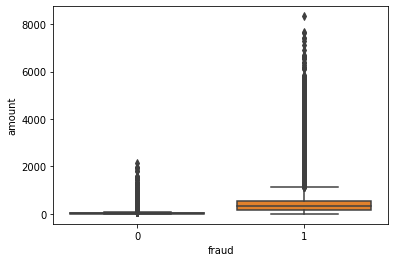

In [32]:

sns.boxplot(x="fraud", y="amount", data=dataset)
plt.show()



In [33]:

print('No Frauds', round(dataset['fraud'].value_counts()[0]/len(dataset) * 100,2), '% of the dataset')
print('Frauds', round(dataset['fraud'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset')


No Frauds 98.79 % of the dataset
Frauds 1.21 % of the dataset


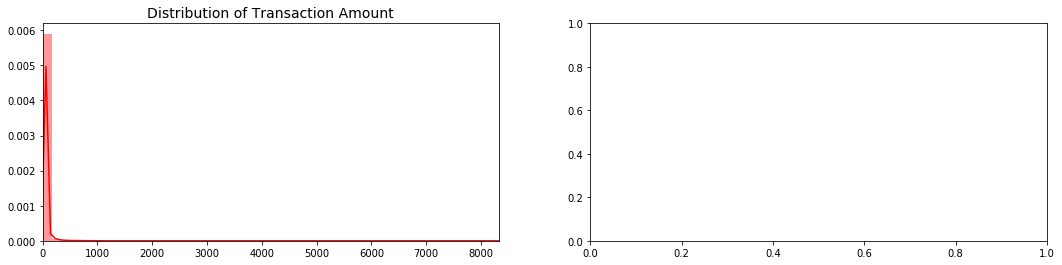

In [34]:

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = dataset['amount'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
plt.show()


    


In [56]:
SAFE_RATIO = 0.5

fraud_df = dataset.loc[dataset['fraud'] == 1]

safe_amount = int((len(fraud_df)*2)*SAFE_RATIO)

safe_df = dataset.loc[dataset['fraud'] == 0][:safe_amount]



Fraud & Non Fraud info


In [57]:

len(fraud_df)


7200

In [58]:

len(safe_df)


7200

In [59]:

norm_distri_df = pd.concat([fraud_df, safe_df])
dataframe = norm_distri_df.sample(frac=1, random_state=42)

if DEBUG:
    dataframe = dataframe.loc[:100,:]


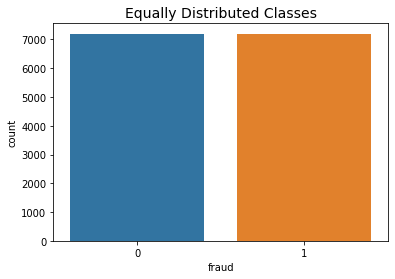

In [60]:
sns.countplot('fraud', data=dataframe)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()


In [61]:
len(dataframe)


14400

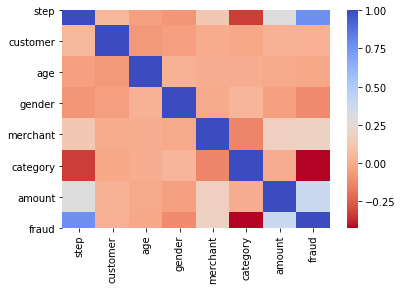

In [41]:

sub_sample_corr = dataframe.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size': 20})
#ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)


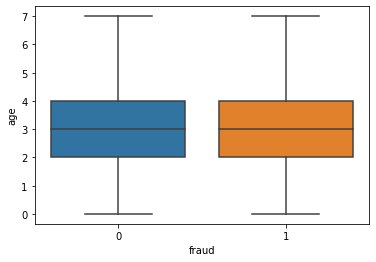

In [64]:


sns.boxplot(x="fraud", y="age", data=dataframe)
plt.show()



Outlier removal with interquartile range 


In [ ]:

sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')
